Domain:
Medicine

Objective:
Goal is to classify the patients into the respective labels using the attributes from their voice recordings

In [1]:
#import libraries that will be used for EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the Parisons data set into Parks dataframe
Parks = pd.read_csv('Data - Parkinsons.csv')

In [3]:
#First look at the data set
Parks.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [4]:
#SInce we have few columns truncated in above view, lets have a look at all the aolumns together
pd.options.display.max_columns = None
Parks.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0           0.00007   0.00370   0.00554     0.01109       0.04374   
1           0.00008   0.00465   0.00696     0.01394       0.06134   
2           0.00009   0.00544   0.00781     0.01633       0.05233   
3           0.00009   0.00502   0.00698     0.01505       0.05492   
4           0.00011   0.00655   0.00908     0.01966       0.06425   

   MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0             0.426       0.02182       0.03130   0.02971      0.06545   
1             0.626       0.03134       0.04518   0.04368      0.09403   
2             0.482       0.02757       0.03858   0.03590      0.08270   
3             0.517       0.02924       0.04005   0.03772      0.08771   
4             0.584       0.03490       0.04825   0.04465      0.10470   

       NHR     HNR  status      RPDE       DFA   spread1   spread2        D2  \
0  0.02211  21.033       1  0.414783  0.815285 -4.813031  0.266482  2.301442   
1  0.01929  19.085       1  0.458359  0.819521 -4.075192  0.335590  2.486855   
2  0.01309  20.651       1  0.429895  0.825288 -4.443179  0.311173  2.342259   
3  0.01353  20.644       1  0.434969  0.819235 -4.117501  0.334147  2.405554   
4  0.01767  19.649       1  0.417356  0.823484 -3.747787  0.234513  2.332180   

        PPE  
0  0.284654  
1  0.368674  
2  0.332634  
3  0.368975  
4  0.410335

In [5]:
Parks.shape
#check the shape of the data - data contains 24 features and 195 records / rows

(195, 24)

In [6]:
Parks.info()
# so we can observe that there is no Null values in our data set
# Data types for all columns is fairly good because it is consistant
# We can avoid Name columnas it will won't support our model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
Parks.isnull().any()
#Another way to check for NULL values

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

In [8]:
Parks.describe().T
#Check details of each columns  

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
status              1.000000    1.000000    1.000000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

In [9]:
Parks.groupby('status').count()
#Parkisons distribution is almost 75% across entire data set

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
status                                                                  
0         48           48            48            48              48   
1        147          147           147           147             147   

        MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
status                                                                   
0                     48        48        48          48            48   
1                    147       147       147         147           147   

        MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
status                                                                        
0                     48            48            48        48           48   
1                    147           147           147       147          147   

        NHR  HNR  RPDE  DFA  spread1  spread2   D2  PPE  
status                                                   
0        48   48    48   48       48       48   48   48  
1       147  147   147  147      147      147  147  147

In [10]:
#SInce Name wont support in model building it can be deleted
Parks = Parks.drop('name', axis = 1)

In [11]:
Parks.shape
#REcheck the shape of the data set 

(195, 23)

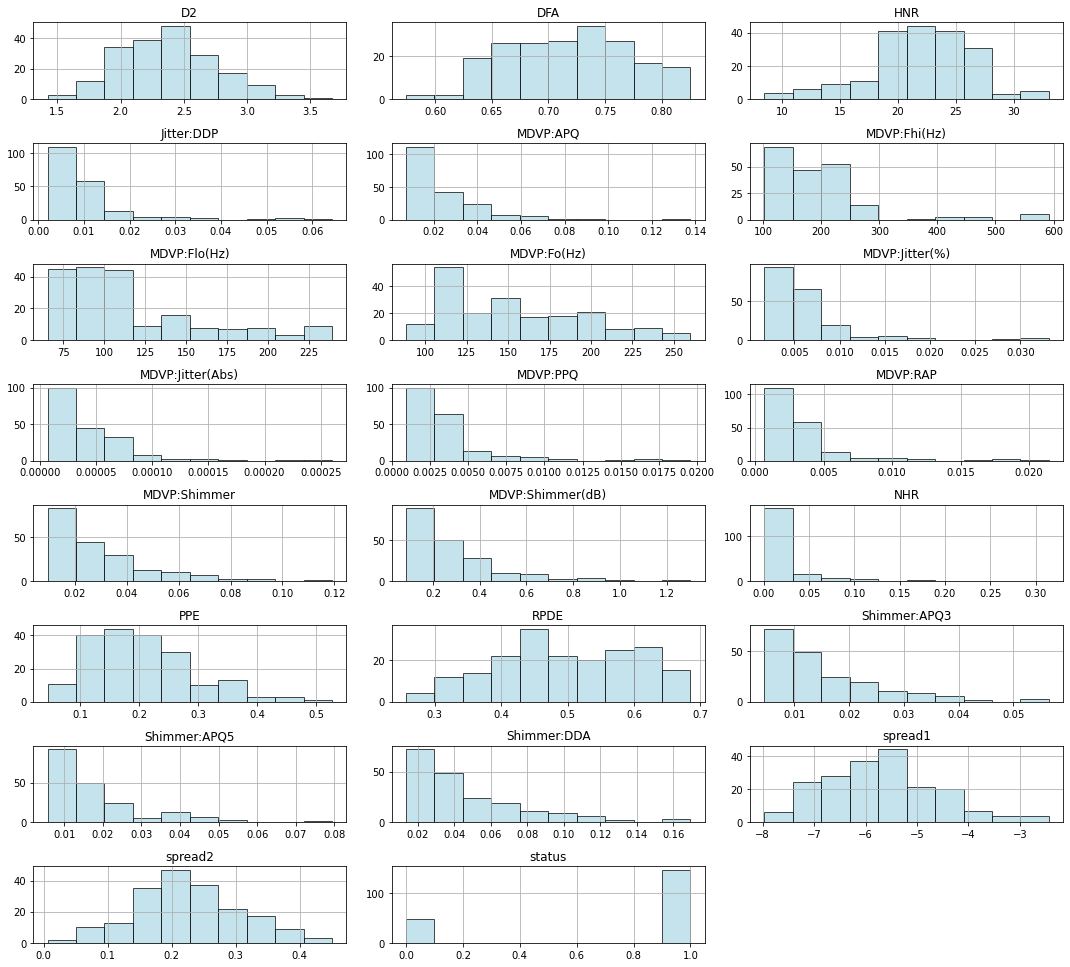

In [12]:
Parks.hist(color='lightblue', edgecolor = 'black', alpha = 0.7, figsize = (15,20), layout=(12,3))
plt.tight_layout()
plt.show()
# from below we can observe that distribution of D2, DFA, HNR, RPDE, Sread 1 and SPread 2 are near to Normal distribution
# and other are quite skewed 

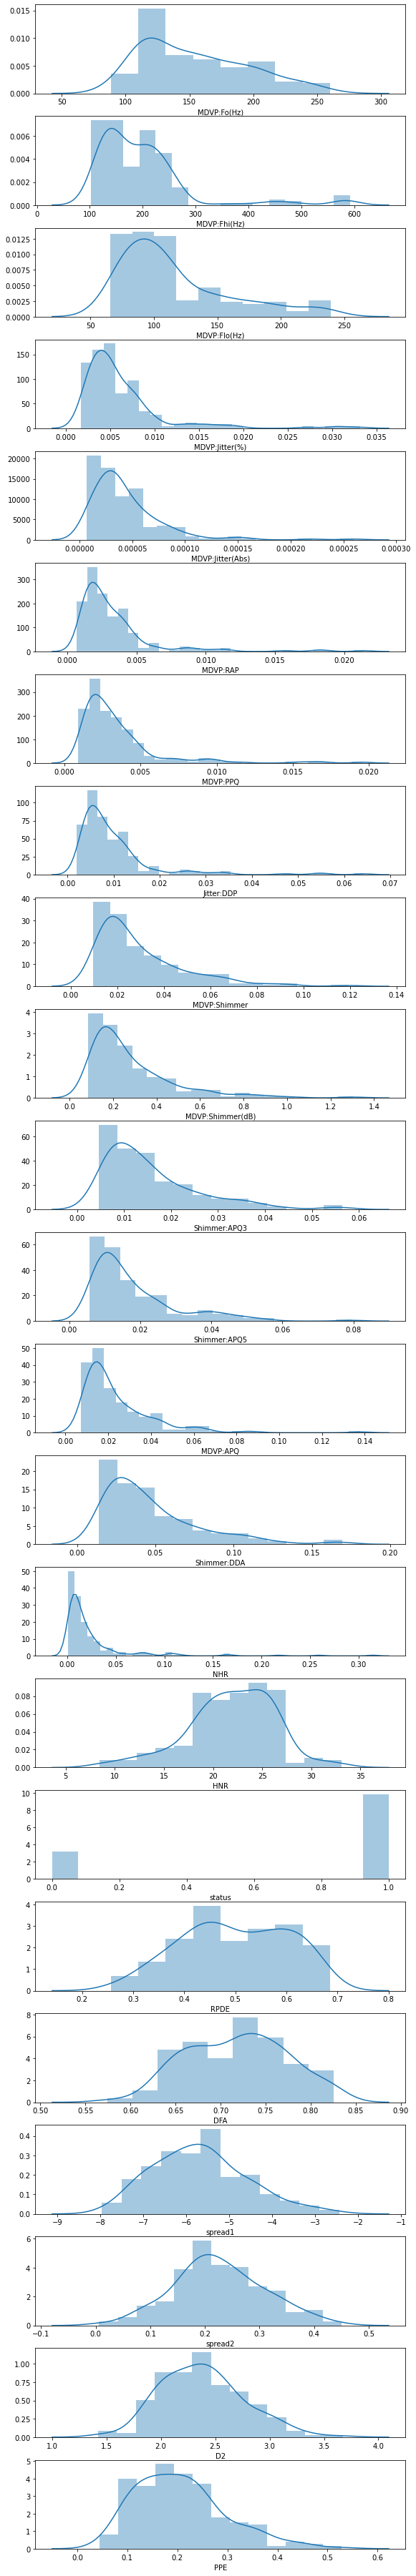

In [13]:
#temp_park = Parks.drop('name', axis = 1)
fig, ax = plt.subplots(23,figsize=(8,50))
plt.tight_layout()
i = 0
for columns in Parks:
    M1 = Parks[columns]
    sns.distplot(M1, ax = ax[i])
    i = i + 1
    
# from below we can see that distribution of MDVP:Fo(Hz),MDVP:Flo(Hz), PPE, D2, DFA, HNR, RPDE, Sread 1 and SPread 2 are near to Normal distribution
# and other are quite skewed 

In [14]:
# For Skewness, closer the value to 0, perfectly the distribution follows normal distribution
#negative skew: The left tail is longer; the mass of the distribution is concentrated on the right of the figure.
#positive skew: The right tail is longer; the mass of the distribution is concentrated on the left of the figure.
Parks.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

  
#### Apart from the visual observation, from above figures we can see that distribution of MDVP:Fo(Hz), PPE, D2, DFA, HNR, RPDE, Sread 1 and SPread 2 are near to Normal distribution and other are quite skewed 

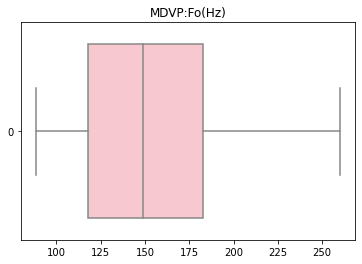

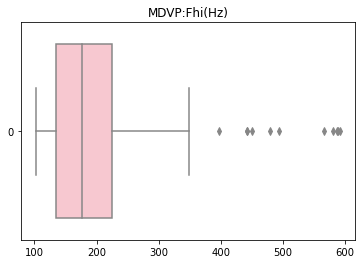

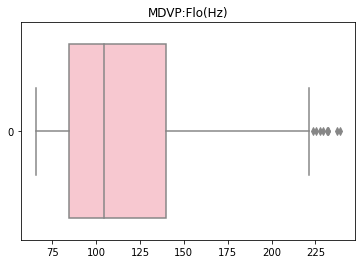

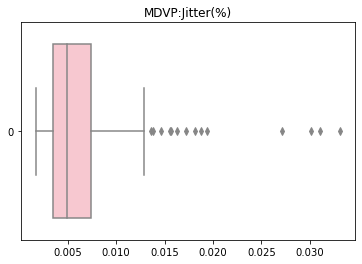

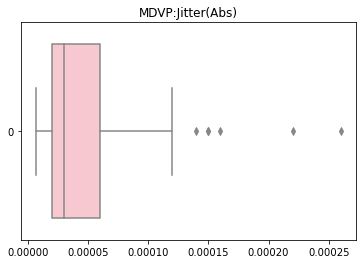

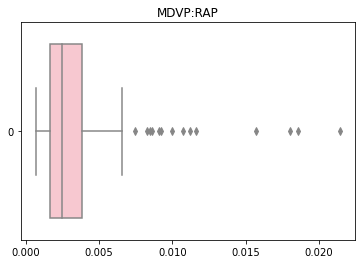

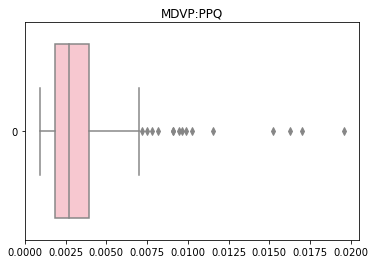

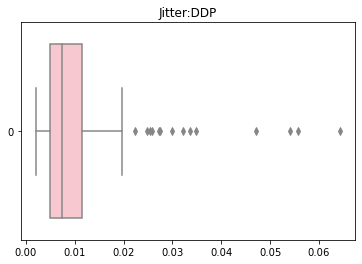

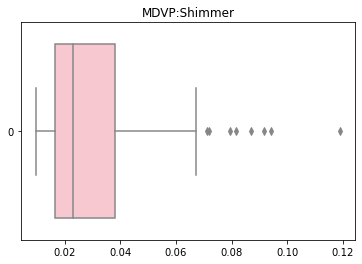

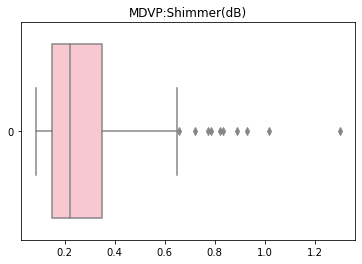

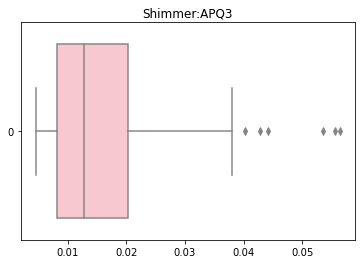

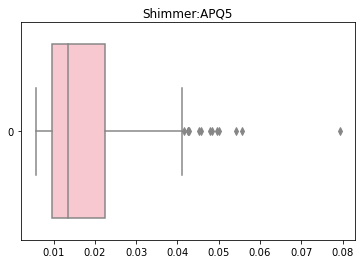

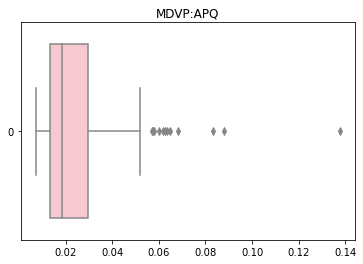

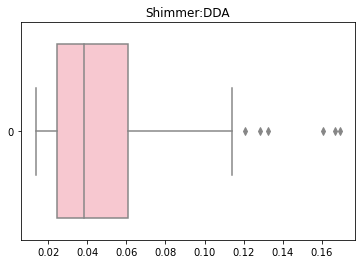

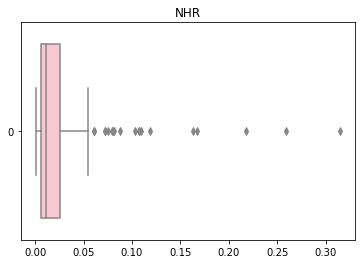

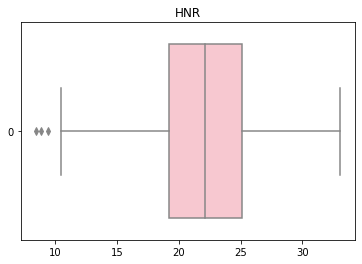

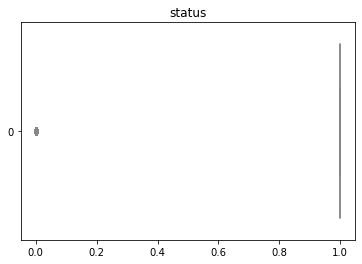

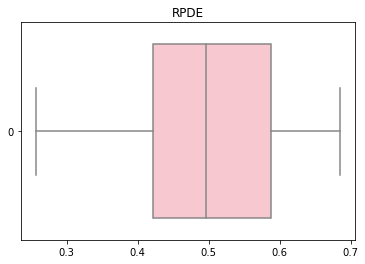

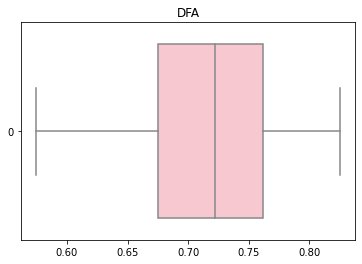

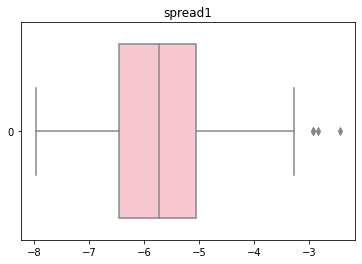

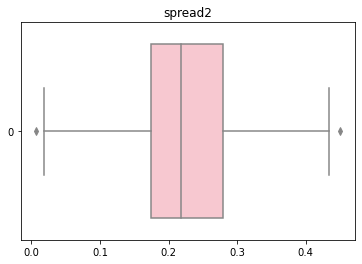

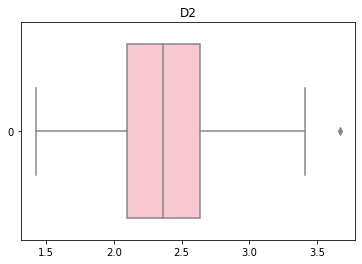

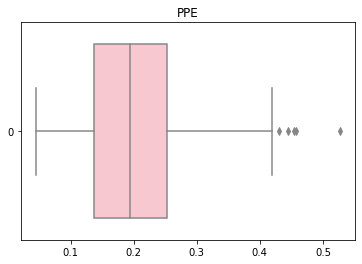

In [15]:
#Lets cehck the presence of outliers in the data set
for columns in Parks:
    plt.figure()
    plt.title(columns)
    sns.boxplot(data = Parks[columns], orient="h" , color = 'pink')

# We can observe that almost all the features except for DFA, RPDE, MDVP:Fo(Hz) have presence of outliers

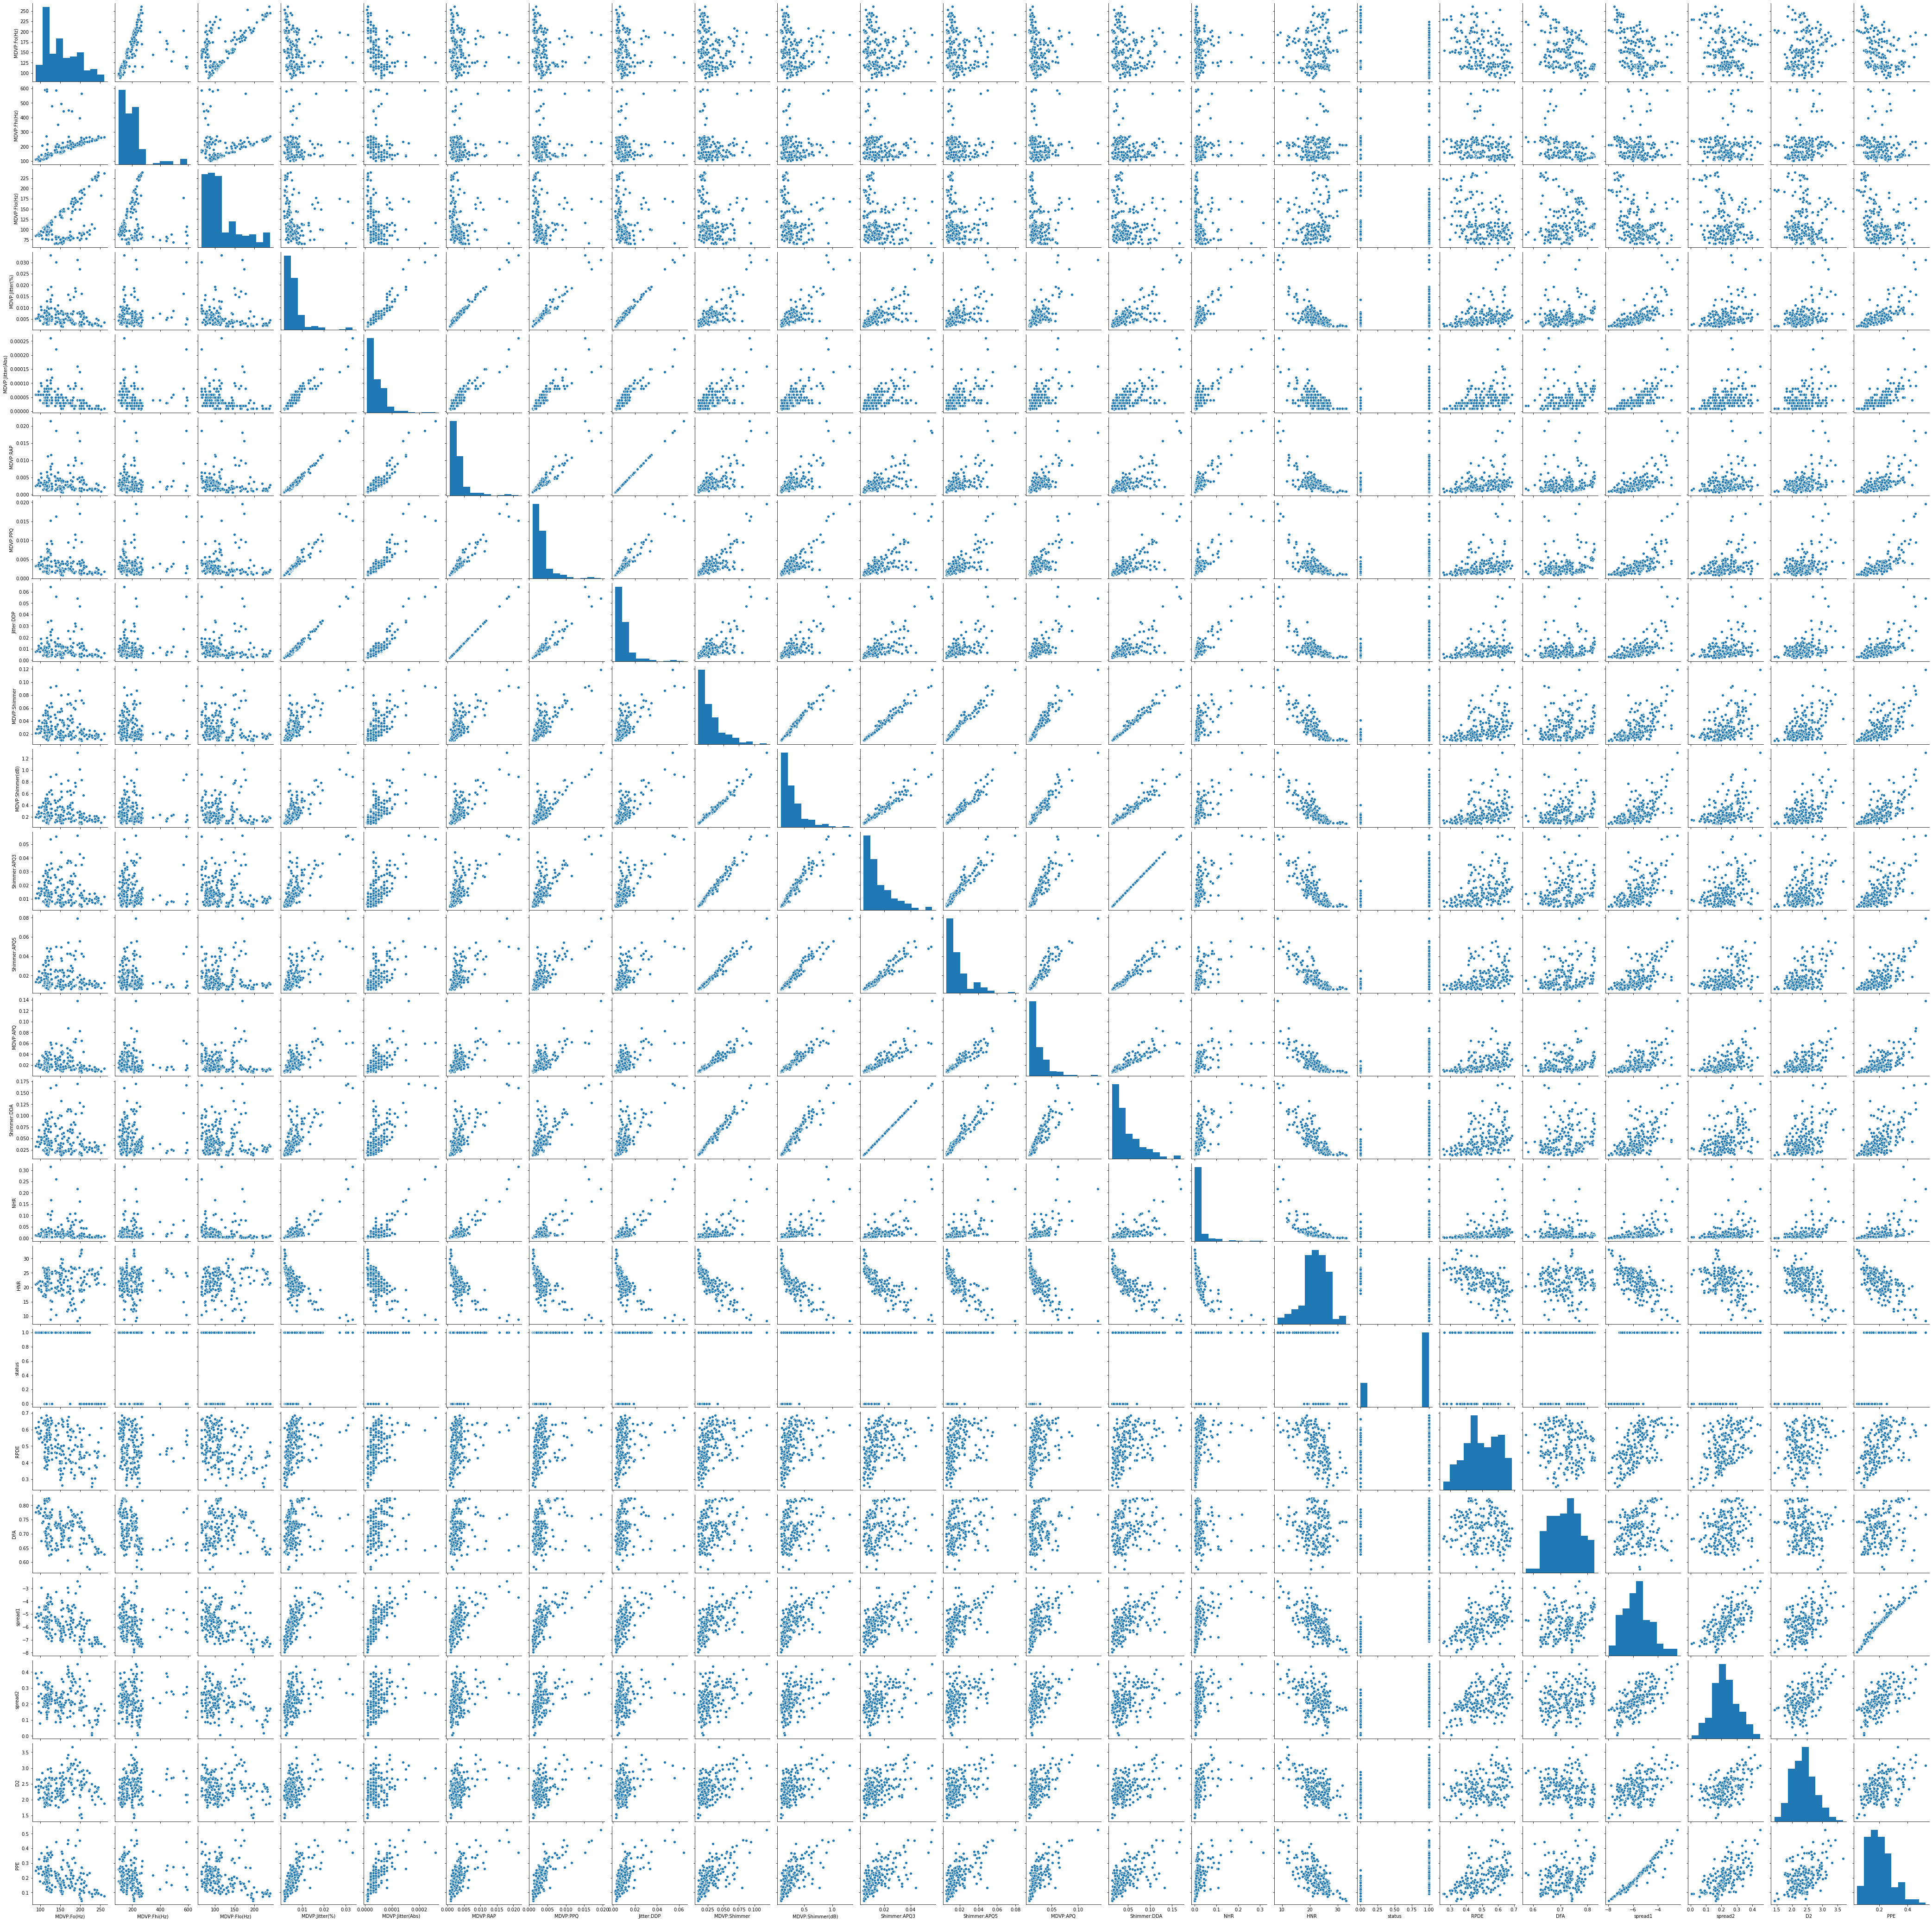

In [16]:
sns.pairplot(Parks)
# Checking the correlation using pairplot, we can observe that due to high number of columns it gets
# difficult to understand the plot

In [17]:
#for correlation, closer the value to 1, higher is the corelation betwen two features
Parks.corr()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546       -0.118003   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000       -0.139919   
MDVP:Jitter(%)      -0.118003      0.102086     -0.139919        1.000000   
MDVP:Jitter(Abs)    -0.382027     -0.029198     -0.277815        0.935714   
MDVP:RAP            -0.076194      0.097177     -0.100519        0.990276   
MDVP:PPQ            -0.112165      0.091126     -0.095828        0.974256   
Jitter:DDP          -0.076213      0.097150     -0.100488        0.990276   
MDVP:Shimmer        -0.098374      0.002281     -0.144543        0.769063   
MDVP:Shimmer(dB)    -0.073742      0.043465     -0.119089        0.804289   
Shimmer:APQ3        -0.094717     -0.003743     -0.150747        0.746625   
Shimmer:APQ5        -0.070682     -0.009997     -0.101095        0.725561   
MDVP:APQ            -0.077774      0.004937     -0.107293        0.758255   
Shimmer:DDA         -0.094732     -0.003733     -0.150737        0.746635   
NHR                 -0.021981      0.163766     -0.108670        0.906959   
HNR                  0.059144     -0.024893      0.210851       -0.728165   
status              -0.383535     -0.166136     -0.380200        0.278220   
RPDE                -0.383894     -0.112404     -0.400143        0.360673   
DFA                 -0.446013     -0.343097     -0.050406        0.098572   
spread1             -0.413738     -0.076658     -0.394857        0.693577   
spread2             -0.249450     -0.002954     -0.243829        0.385123   
D2                   0.177980      0.176323     -0.100629        0.433434   
PPE                 -0.372356     -0.069543     -0.340071        0.721543   

                  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  \
MDVP:Fo(Hz)              -0.382027 -0.076194 -0.112165   -0.076213   
MDVP:Fhi(Hz)             -0.029198  0.097177  0.091126    0.097150   
MDVP:Flo(Hz)             -0.277815 -0.100519 -0.095828   -0.100488   
MDVP:Jitter(%)            0.935714  0.990276  0.974256    0.990276   
MDVP:Jitter(Abs)          1.000000  0.922911  0.897778    0.922913   
MDVP:RAP                  0.922911  1.000000  0.957317    1.000000   
MDVP:PPQ                  0.897778  0.957317  1.000000    0.957319   
Jitter:DDP                0.922913  1.000000  0.957319    1.000000   
MDVP:Shimmer              0.703322  0.759581  0.797826    0.759555   
MDVP:Shimmer(dB)          0.716601  0.790652  0.839239    0.790621   
Shimmer:APQ3              0.697153  0.744912  0.763580    0.744894   
Shimmer:APQ5              0.648961  0.709927  0.786780    0.709907   
MDVP:APQ                  0.648793  0.737455  0.804139    0.737439   
Shimmer:DDA               0.697170  0.744919  0.763592    0.744901   
NHR                       0.834972  0.919521  0.844604    0.919548   
HNR                      -0.656810 -0.721543 -0.731510   -0.721494   
status                    0.338653  0.266668  0.288698    0.266646   
RPDE                      0.441839  0.342140  0.333274    0.342079   
DFA                       0.175036  0.064083  0.196301    0.064026   
spread1                   0.735779  0.648328  0.716489    0.648328   
spread2                   0.388543  0.324407  0.407605    0.324377   
D2                        0.310694  0.426605  0.412524    0.426556   
PPE                       0.748162  0.670999  0.769647    0.671005   

                  MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
MDVP:Fo(Hz)          -0.098374         -0.073742     -0.094717     -0.070682   
MDVP:Fhi(Hz)          0.002281          0.043465     -0.003743     -0.009997   
MDVP:Flo(Hz)         -0.144543         -0.119089     -0.150747     -0.101095   
MDVP:Jitter(%)        0.769063          0.804289      0.746625      0.725561   
MDVP:Jitter(Abs)      0.703322          0.716601      0.697153      0.648961   
MDVP:RAP

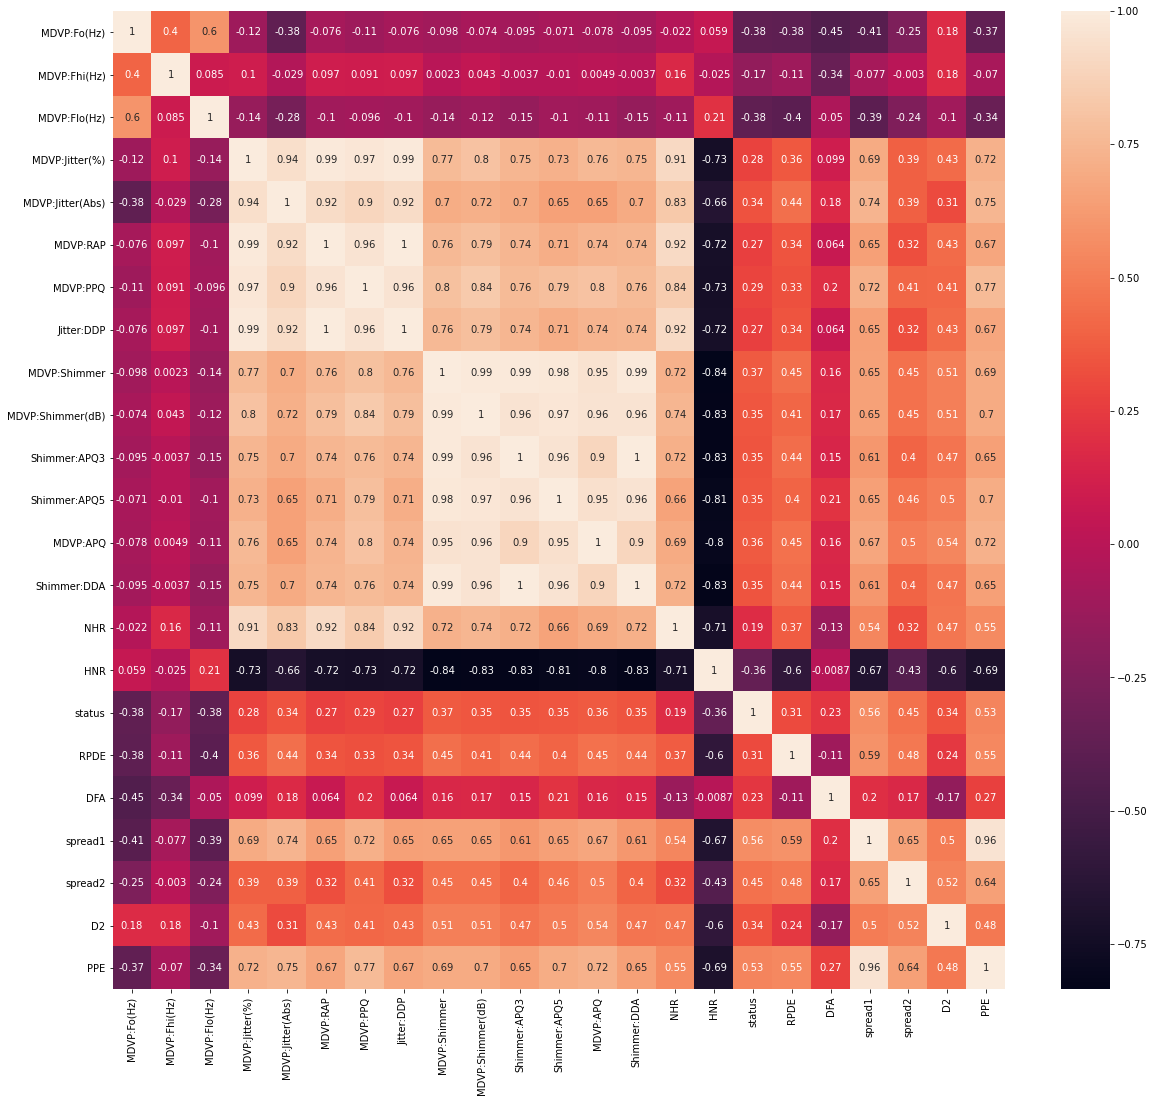

In [18]:
#Visual representation of above correlation 
plt.figure(figsize = (20,18))
sns.heatmap(Parks.corr(), annot = True)

From above we can infer that Spread 1, spread 2, PPE have considerable correlation and many other features have positive correaltions.


ALso, MDVP:Fo, MDVP:Fhi, MDVP:Flo, HNR have negative correlation.

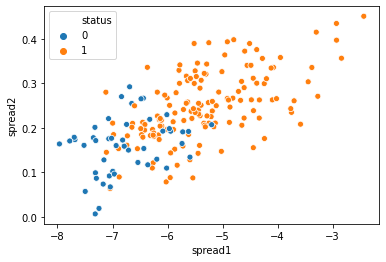

In [19]:
#Lets see distribution of good correlated featres with status
sns.scatterplot(x='spread1', y = 'spread2' , hue = 'status' , data = Parks)
# we can see that higher values of spread1 and spread 2 have more positive cases

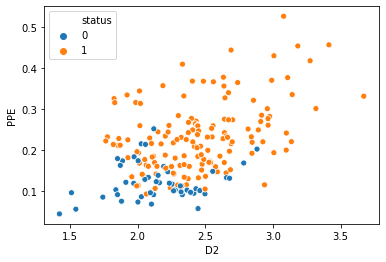

In [20]:
sns.scatterplot(x='D2', y = 'PPE' , hue = 'status' , data = Parks)
# we can see that higher values of PPE and D2 have more positive cases

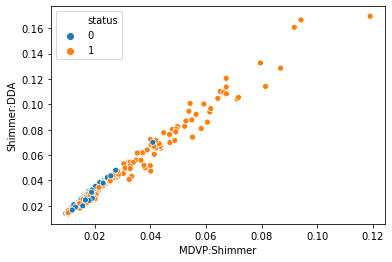

In [21]:
sns.scatterplot(x='MDVP:Shimmer', y = 'Shimmer:DDA' , hue = 'status' , data = Parks)
# we can see that positive cases have a good spread for all overall Shimmer:DDA and MDVP:Shimmer

# - Creating Training and Testing data sets

In [22]:
x = Parks.drop('status', axis = 1)
y = Parks['status']
print('Shape of x and y data set is ', x.shape , y.shape, 'respctively')

Shape of x and y data set is  (195, 22) (195,) respctively


In [23]:
# Dropping features that does nto have any correlation with status columns
x = x.drop(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'HNR'], axis = 1)
print('Shape of x data set after dropping non correlated features', x.shape)

Shape of x data set after dropping non correlated features (195, 18)


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1)

# - Since Decision tree can handle non scaled features, lets create DTree model first

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix, recall_score

In [26]:
#Build the model based on Gini criteria
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)

#Prediction on test data
GDTree_pred = dTree.predict(x_test)

# Let's measure the accuracy of this model's prediction
print('Accuracy of the Decision Tree model with Gini critera is', accuracy_score(y_test, GDTree_pred)*100)
print('\n\n Classification Report:')
print(metrics.classification_report(y_test, GDTree_pred))

Accuracy of the Decision Tree model with Gini critera is 79.66101694915254


 Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.53      0.62        19
           1       0.80      0.93      0.86        40

    accuracy                           0.80        59
   macro avg       0.79      0.73      0.74        59
weighted avg       0.79      0.80      0.78        59



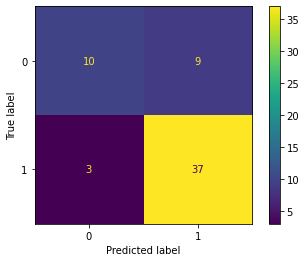

In [27]:
# Plotting confusion matrix
plot_confusion_matrix(dTree,x_test,y_test)


part 1: 
Model predicted 10 (TN) cases correctly as people did not have parkisons and 9 (FN) cases incorrectly as people have Parkisons but actually they did not.

Part 2:
Model predicted 3 (FP) cases incorrectly as people did not have parkisons but actually they did have Parkisons and 37 (TP) cases correctly as people have Parkisons

Since our objective is to classify patients into Parkisons and healthy labels, identifying correct Parkisons patients holds the highest consideration factor for choosing the Model.
So we can say that success rate of this model is 93%

#### lets regularize decision tree

In [28]:
for k in range(1,10):
    dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = k, random_state=1)
    dTreeR.fit(x_train, y_train)
    ydT_pred = dTreeR.predict(x_test)
    
    print('\nAccuracy for Training data with', k ,' depth tree is:' ,dTreeR.score(x_train, y_train) * 100)
    print('Accuracy for Testing data with', k, ' depth treee is:' ,dTreeR.score(x_test, y_test)*100)
    print('Recall score for testing data with' , k, 'depth tree is:', metrics.recall_score(y_test, ydT_pred)*100)


Accuracy for Training data with 1  depth tree is: 88.97058823529412
Accuracy for Testing data with 1  depth treee is: 81.35593220338984
Recall score for testing data with 1 depth tree is: 90.0

Accuracy for Training data with 2  depth tree is: 91.17647058823529
Accuracy for Testing data with 2  depth treee is: 76.27118644067797
Recall score for testing data with 2 depth tree is: 95.0

Accuracy for Training data with 3  depth tree is: 97.05882352941177
Accuracy for Testing data with 3  depth treee is: 79.66101694915254
Recall score for testing data with 3 depth tree is: 92.5

Accuracy for Training data with 4  depth tree is: 99.26470588235294
Accuracy for Testing data with 4  depth treee is: 79.66101694915254
Recall score for testing data with 4 depth tree is: 92.5

Accuracy for Training data with 5  depth tree is: 99.26470588235294
Accuracy for Testing data with 5  depth treee is: 79.66101694915254
Recall score for testing data with 5 depth tree is: 92.5

Accuracy for Training data wi

In [29]:
#We can see that DTree with depth 1 can achive test accuracy of 81.36%, 
#but DTree with depth 2 gives better recall score
#so lets create a Decision tree with depth 2 and save the model for future comparision

#Build the model based on Gini criteria
GdTree = DecisionTreeClassifier(criterion = 'gini', random_state=1 , max_depth = 2 )
GdTree.fit(x_train, y_train)

#Prediction on test data
GDTree_pred = GdTree.predict(x_test)

#Lets take accuracy into one variable
DT_Accuracy = accuracy_score(y_test, GDTree_pred)*100
DT_Recallscore = recall_score(y_test, GDTree_pred)*100

# Let's measure the accuracy of this model's prediction
print('Accuracy of the Decision Tree model with Gini critera is', DT_Accuracy)
print('\n\n Classification Report:')
print(metrics.classification_report(y_test, GDTree_pred))

Accuracy of the Decision Tree model with Gini critera is 76.27118644067797


 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.37      0.50        19
           1       0.76      0.95      0.84        40

    accuracy                           0.76        59
   macro avg       0.77      0.66      0.67        59
weighted avg       0.77      0.76      0.73        59



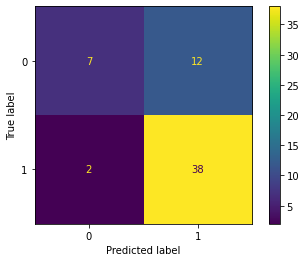

In [30]:
# Plotting confusion matrix
plot_confusion_matrix(GdTree,x_test,y_test)


part 1: 
Model predicted 7 (TN) cases correctly as people did not have parkisons and 12 (FN) cases incorrectly as people have Parkisons but actually they did not.

Part 2:
Model predicted 2 (FP) cases incorrectly as people did not have parkisons but actually they did have Parkisons and 38 (TP) cases correctly as people have Parkisons

Since our objective is to classify patients into Parkisons and healthy labels, identifying correct Parkisons patients holds the highest consideration factor for choosing the Model.
So we can say that success rate of this model is 95% which is more than the previous non regularized Dtree model with 93% recall for predicting correct Parkisons patients

# - Decision tree with entropy model

In [31]:
#Build the model based on entropy criteria
EdTree = DecisionTreeClassifier(criterion = 'entropy', random_state=1 )
EdTree.fit(x_train, y_train)

#Prediction on test data
EDTree_pred = EdTree.predict(x_test)

# Let's measure the accuracy of this model's prediction
print('Accuracy of the Decision Tree model with Entropy critera is', accuracy_score(y_test, EDTree_pred)*100)
print('\n\n Classification Report:')
print(metrics.classification_report(y_test, EDTree_pred))
print(recall_score(y_test, EDTree_pred))

Accuracy of the Decision Tree model with Entropy critera is 79.66101694915254


 Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.53      0.62        19
           1       0.80      0.93      0.86        40

    accuracy                           0.80        59
   macro avg       0.79      0.73      0.74        59
weighted avg       0.79      0.80      0.78        59

0.925


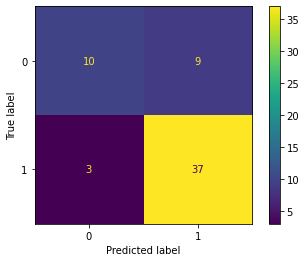

In [32]:
# Plotting confusion matrix
plot_confusion_matrix(EdTree,x_test,y_test)


part 1: 
Model predicted 10 (TN) cases correctly as people did not have parkisons and 9 (FN) cases incorrectly as people have Parkisons but actually they did not.

Part 2:
Model predicted 3 (FP) cases incorrectly as people did not have parkisons but actually they did have Parkisons and 37 (TP) cases correctly as people have Parkisons

So we can say that success rate of this model is 93% for predicting correct Parkisons patients

#  - Scaling the data to standardize all column values

In [33]:
# Apply zscore on triaing and testing data
Xtrainsc = x_train.apply(zscore)
Xtestsc = x_test.apply(zscore)

In [34]:
Xtrainsc.head()

MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  \
42        -0.656847         -0.951712 -0.549393 -0.592247   -0.549480   
17         0.117749         -0.158781 -0.203590  0.074440   -0.202685   
5          0.578818          0.898461  0.334659  1.254964    0.333544   
120       -0.134917          0.105530 -0.332890 -0.162965   -0.332984   
98         1.334970          1.691393  1.426193  0.946012    1.426049   

     MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  \
42      -0.693465         -0.646917     -0.578722     -0.683914 -0.775119   
17       0.086360          0.220167     -0.202806     -0.007198  0.468377   
5        0.766664          0.729107      0.618467      1.264469  0.367143   
120     -0.566713         -0.378310     -0.750939     -0.611492 -0.449764   
98       0.760723          0.568885      0.816610      0.566727  0.727145   

     Shimmer:DDA       NHR      RPDE       DFA   spread1   spread2        D2  \
42     -0.579044 -0.441596 -1.793650 -1.236734 -1.540511 -1.503402  0.058171   
17     -0.203127  0.042715  1.191042 -2.141119  2.495712  2.479394  1.572975   
5       0.618767 -0.334465 -0.782064  1.933334  1.286732  0.875077 -0.529869   
120    -0.750645 -0.083752 -0.121185 -0.681026 -0.504219  0.647532  0.749119   
98      0.816294  1.688352  0.640960 -0.555594  0.442248 -0.275406  0.121710   

          PPE  
42  -1.271526  
17   2.423329  
5    1.619851  
120 -0.639907  
98   0.548005

# - Logistic Regression Model

In [35]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(random_state=0)
LR_model.fit(Xtrainsc, y_train)

# Prediction on of test data
LRY_pred = LR_model.predict(Xtestsc)

#Lets take accuracy into one variable
LR_Accuracy = accuracy_score(y_test, LRY_pred)*100
LR_Recallscore = recall_score(y_test, LRY_pred)*100

# Let's measure the accuracy of this model's prediction
print('Accuracy of the Logistic regression model is', LR_Accuracy)
#We can see that models performance is increased due to scaled values
print('\n\n Classification Report:')
print(metrics.classification_report(y_test, LRY_pred))


Accuracy of the Logistic regression model is 84.7457627118644


 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.58      0.71        19
           1       0.83      0.97      0.90        40

    accuracy                           0.85        59
   macro avg       0.87      0.78      0.80        59
weighted avg       0.86      0.85      0.84        59



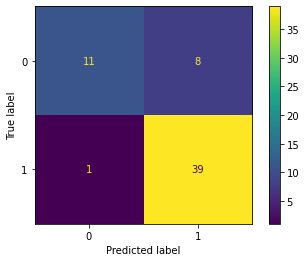

In [36]:
# Plotting confusion matrix
plot_confusion_matrix(LR_model,Xtestsc,y_test)

part 1: 
Model predicted 11 (TN) cases correctly as people did not have parkisons and 8 (FN) cases incorrectly as people have Parkisons but actually they did not.

Part 2:
Model predicted 1 (FP) cases incorrectly as people did not have parkisons but actually they did have Parkisons and 39 (TP) cases correctly as people have Parkisons

So we can say that success rate of this model is 97% which is more than the Decison tree model with 93% recall for predicting correct Parkisons patients

# - KNN model

In [37]:
#Importing libraries for KNN
from sklearn.neighbors import KNeighborsClassifier

In [38]:
#Creating KNN Model
KNN_model = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
KNN_model.fit(Xtrainsc, y_train)

#Prediction on test data
KNNY_pred = KNN_model.predict(Xtestsc)

#Lets take accuracy into one variable
KNN_Accuracy = accuracy_score(y_test, KNNY_pred)*100
KNN_Recallscore = recall_score(y_test, KNNY_pred)*100

print('Accuracy of the KNN model is', KNN_Accuracy)
print('\n\n Classification Report:')
print(metrics.classification_report(y_test, KNNY_pred))

Accuracy of the KNN model is 77.96610169491525


 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.42      0.55        19
           1       0.78      0.95      0.85        40

    accuracy                           0.78        59
   macro avg       0.79      0.69      0.70        59
weighted avg       0.78      0.78      0.76        59



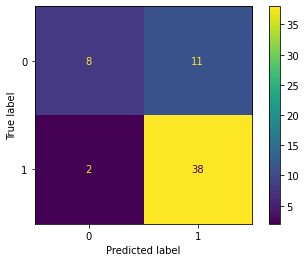

In [39]:
# Plotting confusion Matrix
plot_confusion_matrix(KNN_model, Xtestsc , y_test)

part 1: 
Model predicted 11 (TN) cases correctly as people did not have parkisons and 8 (FN) cases incorrectly as people have Parkisons but actually they did not.

Part 2:
Model predicted 2 (FP) cases incorrectly as people did not have parkisons but actually they did have Parkisons and 38 (TP) cases correctly as people have Parkisons

So we can say that success rate of this model is 95% for predicting correct Parkisons patients

In [40]:
scores =[]
TP =[]
for k in range(1,13):
    KNN_M2 = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    KNN_M2.fit(Xtrainsc, y_train)
    Ysc_pred = KNN_M2.predict(Xtestsc)
    scores.append(KNN_M2.score(Xtestsc,y_test))
    cm = confusion_matrix(y_test,Ysc_pred)
    TP.append(cm[1][1])
    

In [41]:
print('Accuracy score for KNN model with k =1 to 13\n')
print(scores)
print('\nTrue Positive predictions for KNN model on original scaled data with k =1 to 13\n')
print(TP)

Accuracy score for KNN model with k =1 to 13

[0.847457627118644, 0.847457627118644, 0.8305084745762712, 0.8135593220338984, 0.7796610169491526, 0.7796610169491526, 0.7966101694915254, 0.7966101694915254, 0.7966101694915254, 0.7796610169491526, 0.7966101694915254, 0.7796610169491526]

True Positive predictions for KNN model on original scaled data with k =1 to 13

[38, 38, 39, 39, 38, 38, 39, 39, 39, 39, 40, 40]


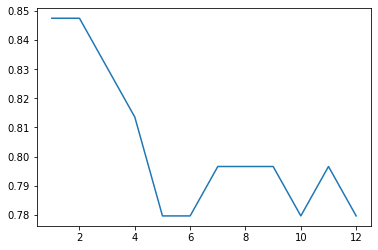

In [42]:
# visual representation of scores for k = 1 to 13
plt.plot(range(1,13),scores)

From above we can see that higher the k value performance of the model is decreased but the TP predicitons increases,
Number of True positive is highest for k_neighbors 12 and 13, so we can choose k value to 12 which gives us accuracy score of 79.6 % and correctly estimating 40 people who have Parkisons which becomes almost 100% success rate for TP predections

#### So lets create KNN model with k = 12 and store its measure for future comparisons

In [43]:
#Creating KNN Model
KNN_model = KNeighborsClassifier(n_neighbors= 12 , weights = 'distance' )
KNN_model.fit(Xtrainsc, y_train)

#Prediction on test data
KNNY_pred = KNN_model.predict(Xtestsc)

#Lets take accuracy into one variable
KNN_Accuracy = accuracy_score(y_test, KNNY_pred)*100
KNN_Recallscore = recall_score(y_test, KNNY_pred)*100

print('Accuracy of the KNN model is', KNN_Accuracy)
print('\n\n Classification Report:')
print(metrics.classification_report(y_test, KNNY_pred))

Accuracy of the KNN model is 77.96610169491525


 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.32      0.48        19
           1       0.75      1.00      0.86        40

    accuracy                           0.78        59
   macro avg       0.88      0.66      0.67        59
weighted avg       0.83      0.78      0.74        59



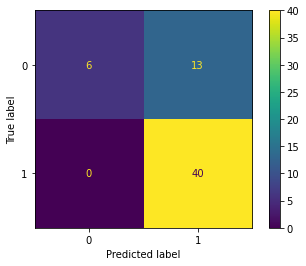

In [44]:
# Plotting confusion Matrix
plot_confusion_matrix(KNN_model, Xtestsc , y_test)

part 1: 
Model predicted 6 (TN) cases correctly as people did not have parkisons and 13 (FN) cases incorrectly as people have Parkisons but actually they did not.

Part 2:
Model predicted 0 (FP) cases incorrectly as people did not have parkisons but actually they did have Parkisons and 40 (TP) cases correctly as people have Parkisons

we can see that although FN esitmates have increased but model predicts TP cases with success rate of 100%

# - Naive Bayes model

In [45]:
#Import necessary libraries
from sklearn.naive_bayes import GaussianNB

#Build the model
NB_model = GaussianNB()
NB_model.fit(Xtrainsc, y_train)

#Prediction on test data
NBY_pred = NB_model.predict(Xtestsc)

#Lets take accuracy into one variable
NB_Accuracy = accuracy_score(y_test, NBY_pred)*100
NB_Recallscore = recall_score(y_test, NBY_pred)*100

print('Accuracy of the Naive Bayes model is', NB_Accuracy )
print("\n\nClassification Report")
print(metrics.classification_report(y_test, NBY_pred))

Accuracy of the Naive Bayes model is 66.10169491525424


Classification Report
              precision    recall  f1-score   support

           0       0.48      0.68      0.57        19
           1       0.81      0.65      0.72        40

    accuracy                           0.66        59
   macro avg       0.65      0.67      0.64        59
weighted avg       0.71      0.66      0.67        59



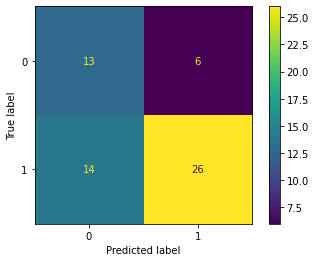

In [46]:
# Plotting confusion Matrix
plot_confusion_matrix(NB_model, Xtestsc , y_test)

part 1: 
Model predicted 13 (TN) cases correctly as people did not have parkisons and 6 (FN) cases incorrectly as people have Parkisons but actually they did not.

Part 2:
Model predicted 14 (FP) cases incorrectly as people did not have parkisons but actually they did have Parkisons and 26 (TP) cases correctly as people have Parkisons

So we can say that success rate of this model is 65% for predicting correct Parkisons patients

# - Random Forest

In [47]:
#Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

#Build the model
RF_model = RandomForestClassifier(n_estimators = 50)
RF_model.fit(Xtrainsc, y_train)

#Prediction on test data
RFY_pred = RF_model.predict(Xtestsc)

#Lets take accuracy into one variable
RF_Accuracy = accuracy_score(y_test, RFY_pred)*100
RF_Recallscore = recall_score(y_test, RFY_pred)*100

print('Accuracy of the Random Forest model is', RF_Accuracy , RF_Recallscore )
print("\n\nClassification Report")
print(metrics.classification_report(y_test, RFY_pred))

Accuracy of the Random Forest model is 76.27118644067797 97.5


Classification Report
              precision    recall  f1-score   support

           0       0.86      0.32      0.46        19
           1       0.75      0.97      0.85        40

    accuracy                           0.76        59
   macro avg       0.80      0.65      0.65        59
weighted avg       0.78      0.76      0.72        59



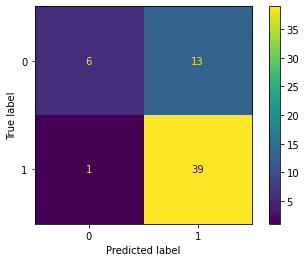

In [48]:
# Plotting confusion Matrix
plot_confusion_matrix(RF_model, Xtestsc , y_test)

part 1: 
Model predicted 6 (TN) cases correctly as people did not have parkisons and 13 (FN) cases incorrectly as people have Parkisons but actually they did not.

Part 2:
Model predicted 1 (FP) cases incorrectly as people did not have parkisons but actually they did have Parkisons and 39 (TP) cases correctly as people have Parkisons

So we can say that success rate of this model is 97% for predicting correct Parkisons patients

# - Creating a Meta Classifier

In [49]:
#Import necessary libraries
from mlxtend.classifier import StackingCVClassifier

In [50]:
#Build the meta classifier model
MC_model = StackingCVClassifier(classifiers=[LR_model, KNN_model, NB_model, RF_model, GdTree ], meta_classifier = LogisticRegression(random_state=0))
MC_model.fit(Xtrainsc,y_train)

#prediction on test data
MCY_pred = MC_model.predict(Xtestsc)

#Lets take accuracy into one variable
MC_Accuracy = accuracy_score(y_test, MCY_pred)*100
MC_Recallscore = recall_score(y_test, MCY_pred)*100

print('Accuracy of the Meta model is', MC_Accuracy )
print("\n\nClassification Report")
print(metrics.classification_report(y_test, MCY_pred))

Accuracy of the Meta model is 76.27118644067797


Classification Report
              precision    recall  f1-score   support

           0       0.86      0.32      0.46        19
           1       0.75      0.97      0.85        40

    accuracy                           0.76        59
   macro avg       0.80      0.65      0.65        59
weighted avg       0.78      0.76      0.72        59



# - Creating dataframe for model comparision

In [51]:
data = { 'Model' : ['Logistic Regression' , 'KNN' , 'Naive Bayes' , 'Random Forest' , 'Decision Tree', 'Meta Classifier'] ,
        'Accuracy' : [LR_Accuracy, KNN_Accuracy,NB_Accuracy,RF_Accuracy,DT_Accuracy,MC_Accuracy] ,
        'Recall Score' : [LR_Recallscore, KNN_Recallscore,NB_Recallscore,RF_Recallscore,DT_Recallscore,MC_Recallscore]
       }
df = pd.DataFrame(data)
df

Model   Accuracy  Recall Score
0  Logistic Regression  84.745763          97.5
1                  KNN  77.966102         100.0
2          Naive Bayes  66.101695          65.0
3        Random Forest  76.271186          97.5
4        Decision Tree  76.271186          95.0
5      Meta Classifier  76.271186          97.5

<function matplotlib.pyplot.show(*args, **kw)>

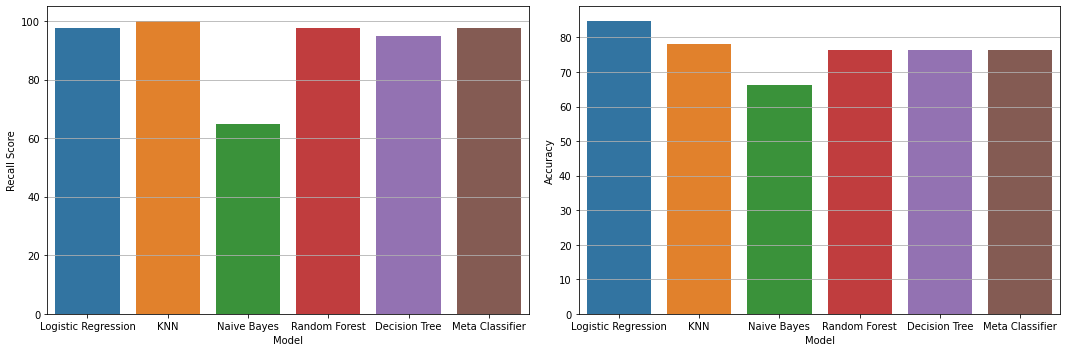

In [53]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='Model' , y = 'Recall Score' , data = df,ax = ax[0] )
sns.barplot(x='Model' , y = 'Accuracy' , data = df ,ax = ax[1])
plt.rcParams['axes.grid'] = True
fig.tight_layout()
plt.show

#### From above plots we can see that Accuracy score is highest for Logistic regresion however the recall score (predicting correct Parkisons patient) is highest for KNN model and Meta classifier
#### Since this is an healthcare project, Model which performs best in predicting True Positive cases will be preferred.
## Hence in our case, KNN Model or Meta classifier giving the maximum recall will be considered best
